In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [5]:
len(set(y_train.flatten()))

10

In [6]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [9]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [10]:
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 42s 21ms/step - loss: 0.1717 - accuracy: 0.9478 - val_loss: 0.0598 - val_accuracy: 0.9807
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0560 - accuracy: 0.9826 - val_loss: 0.0371 - val_accuracy: 0.9876
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0399 - accuracy: 0.9871 - val_loss: 0.0557 - val_accuracy: 0.9812
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0321 - accuracy: 0.9897 - val_loss: 0.0390 - val_accuracy: 0.9874
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0248 - accuracy: 0.9925 - val_loss: 0.0281 - val_accuracy: 0.9906
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0203 - accuracy: 0.9934 - val_loss: 0.0344 - val_accuracy: 0.9896
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0178 - accuracy: 0.9941 - val_loss: 0.0320 -

In [11]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0289 - accuracy: 0.9915


[0.028897659853100777, 0.9915000200271606]

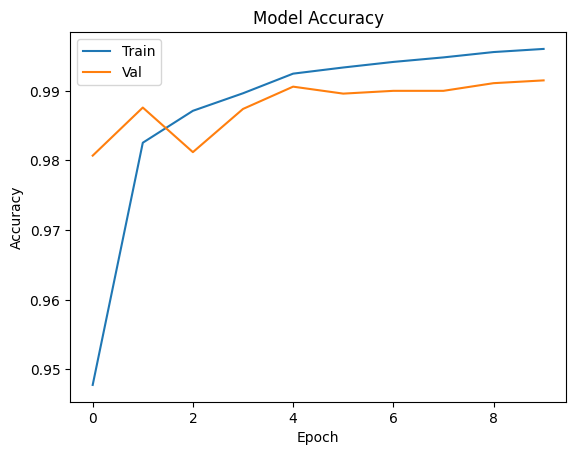

In [12]:
#plot the training and validation accuracy using matplot lib

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Val'],loc='upper left')
plt.show()
